<b>Problem statement</b> : Maximization of the profit from selling a variety of products, each of which requires different amounts of different materials that have different costs. Each of these functions has a different demand function and sells for a different amount of money. Suppose our factory makes three products : kitchen tables, kitchen chairs and juice carts. 


The final equation after taking into account all the above given factors is as follows - 

This tutorial starts by presenting the equation that we are going to implement. The equation is shown below:

<b>profit = 2x1 + 7x2 + 4x3</b>

The equation has 3 inputs (x1 to x3) and 3 weights (w1 to w3) as shown and inputs values are (x1,x2,x3)=(2,7,4). 

We are looking to find the parameters (weights) that maximize such equation. The idea of maximizing such equation seems simple. The positive input is to be multiplied by the largest possible positive number and the negative number is to be multiplied by the smallest possible negative number. But the idea we are looking to implement is how to make GA do that its own in order to know that it is better to use positive weight with positive inputs and negative weights with negative inputs. Let us start implementing GA.

At first, let us create a list of the 3 inputs and a variable to hold the number of weights as follows:


In [1]:
# Inputs of the equation.
equation_inputs = [2, 7, 4]
# Number of the weights we are looking to optimize.
num_weights = 3

The next step is to define the initial population. Based on the number of weights, each chromosome (solution or individual) in the population will definitely have 3 genes, one gene for each weight. 

<b>But the question is how many solutions per the population?</b> 

There is no fixed value for that and we can select the value that fits well with our problem. But we could leave it generic so that it can be changed in the code. Next, we create a variable that holds the number of solutions per population, another to hold the size of the population, and finally, a variable that holds the actual initial population:

In [2]:
import numpy
sol_per_pop = 8
# Defining the population size.
num_parents_mating = 3

pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.

#Creating the initial population.
#we will be adding the constraint that the 0.0 <= new_population array values <=10.0
new_population = numpy.random.uniform(low=0.0, high=10.0, size=pop_size)

After importing the numpy library, we are able to create the initial population randomly using the numpy.random.uniform function. According to the selected parameters, it will be of shape (8, 3). That is 8 chromosomes and each one has 3 genes, one for each weight. After running this code, the population is as follows

In [4]:
new_population

array([[2.7452646 , 4.90080846, 3.23387098],
       [7.65085869, 6.87633123, 0.83154126],
       [9.0149917 , 8.91405143, 5.09614088],
       [4.68333759, 2.14833628, 5.64061273],
       [0.12046639, 7.27095607, 0.91914239],
       [8.39788593, 2.75743566, 2.3068118 ],
       [5.61240699, 5.30377753, 8.54640961],
       [3.52323206, 7.7329688 , 2.40982727]])

Note that it is generated randomly and thus it will definitely change when get run again.


1. After preparing the population, we are going to select the best individuals within the current population as parents for mating i.e. calculate the fitness function. 

2. Next is to apply the GA variants (crossover and mutation) to produce the offspring of the next generation, creating the new population by appending both parents and offspring, and repeating such steps for a number of iterations/generations. The next code applies these steps:

In [7]:
import numpy
import ga_modules

"""
The y=target is to maximize this equation ASAP:
    y = w1x1+w2x2+w3x3+w4x4+w5x5+6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)
    What are the best values for the 6 weights w1 to w6?
    We are going to use the genetic algorithm for the best possible values after a number of generations.
"""

# Inputs of the equation.
equation_inputs = [2, 7, 4]

# Number of the weights we are looking to optimize.
num_weights = len(equation_inputs)

"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""
sol_per_pop = 8
num_parents_mating = 2

# Defining the population size.
pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
#Creating the initial population.
new_population = numpy.random.uniform(low=0.0, high=100.0, size=pop_size)
print(new_population)

"""
new_population[0, :] = [2.4,  0.7, 8, -2,   5,   1.1]
new_population[1, :] = [-0.4, 2.7, 5, -1,   7,   0.1]
new_population[2, :] = [-1,   2,   2, -3,   2,   0.9]
new_population[3, :] = [4,    7,   12, 6.1, 1.4, -4]
new_population[4, :] = [3.1,  4,   0,  2.4, 4.8,  0]
new_population[5, :] = [-2,   3,   -7, 6,   3,    3]
"""

best_outputs = []
num_generations = 5
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = ga_modules.cal_pop_fitness(equation_inputs, new_population)
    print("Fitness")
    print(fitness)

    best_outputs.append(numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    # The best result in the current iteration.
    print("Best result : ", numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    
    # Selecting the best parents in the population for mating.
    parents = ga_modules.select_mating_pool(new_population, fitness, 
                                      num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = ga_modules.crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    print("Crossover")
    print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    offspring_mutation = ga_modules.mutation(offspring_crossover, num_mutations=2)
    print("Mutation")
    print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation


[[42.65403515 36.04109989 59.66371672]
 [46.8275611  22.02703144 24.40290119]
 [12.83080148 24.09140271 57.44480771]
 [19.35539408 68.84883488 19.4204067 ]
 [ 5.16518642 73.9472893  11.68529705]
 [ 9.97919237 94.75051329 52.86726316]
 [47.92500614 97.05862744  4.83144041]
 [ 4.81355672 65.171241   87.13196167]]
Generation :  0
Fitness
[576.25063644 345.45594702 424.08065281 598.33425917 574.70258618
 894.68103044 794.58616599 814.35364715]
Best result :  894.6810304376731
Parents
[[ 9.97919237 94.75051329 52.86726316]
 [ 4.81355672 65.171241   87.13196167]]
Crossover
[[ 9.97919237 65.171241   87.13196167]
 [ 4.81355672 94.75051329 52.86726316]
 [ 9.97919237 65.171241   87.13196167]
 [ 4.81355672 94.75051329 52.86726316]
 [ 9.97919237 65.171241   87.13196167]
 [ 4.81355672 94.75051329 52.86726316]]
Mutation
[[10.27567291 65.32486962 87.13196167]
 [ 4.64759571 95.00154012 52.86726316]
 [ 9.5699655  64.17556734 87.13196167]
 [ 4.39414433 93.89818672 52.86726316]
 [10.7625225  64.61233259 

In [8]:
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = ga_modules.cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])

Best solution :  [[[12.7319308  97.51082785 52.86726316]]]
Best solution fitness :  [919.50870923]


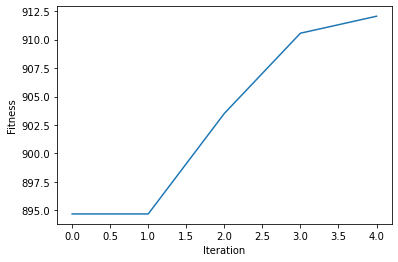

In [9]:
import matplotlib.pyplot
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()